# Maze Score and Performance Analysis

In [64]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the data

In [151]:
# Load the data from the CSV file
csv_file_path = 'complete.csv'  # Update this to the correct path where your file is located
data = pd.read_csv(csv_file_path)
data.head()

,Participant,Run,Velocity(m/s),Delay(ms),Time(s),Maze Score,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score
0,1,1,5.0,0,30.51,89.16,60,0,80,20,50,10,36.666667
1,1,2,3.6,0,39.69,100.00,20,0,60,10,20,10,20.000000
2,1,3,6.0,2000,60.09,100.00,80,0,90,60,100,100,71.666667
3,2,1,6.0,0,24.18,78.02,70,0,40,20,50,0,30.000000
4,2,2,2.2,250,62.25,66.87,60,0,0,70,50,50,38.333333


## 1. Descriptive Statistics

In [155]:
# Display descriptive statistics
print("Descriptive Statistics:")
# Describe the data withouth Participant, Run, and Trial columns
data.drop(columns=['Participant', 'Run', 'Delay(ms)', 'Velocity(m/s)']).describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Time(s),24.0,52.733750,22.851677,22.88,32.9425,49.290000,65.212500,114.410000
Maze Score,24.0,72.076250,20.826282,35.89,52.7975,73.645000,89.237500,100.000000
Mental Demand,24.0,47.916667,24.313025,10.00,20.0000,55.000000,70.000000,80.000000
Physical Demand,24.0,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000
Temporal Demand,24.0,41.458333,28.379385,0.00,18.7500,40.000000,62.500000,90.000000
Performance,24.0,35.000000,21.869176,5.00,20.0000,30.000000,51.250000,75.000000
Effort,24.0,49.375000,27.792418,10.00,27.5000,50.000000,75.000000,100.000000
Frustration,24.0,28.333333,29.878983,0.00,5.0000,20.000000,40.000000,100.000000
Overall Score,24.0,33.680556,17.125772,7.50,23.7500,32.916667,41.666667,71.666667


## 2. Correlation Matrix

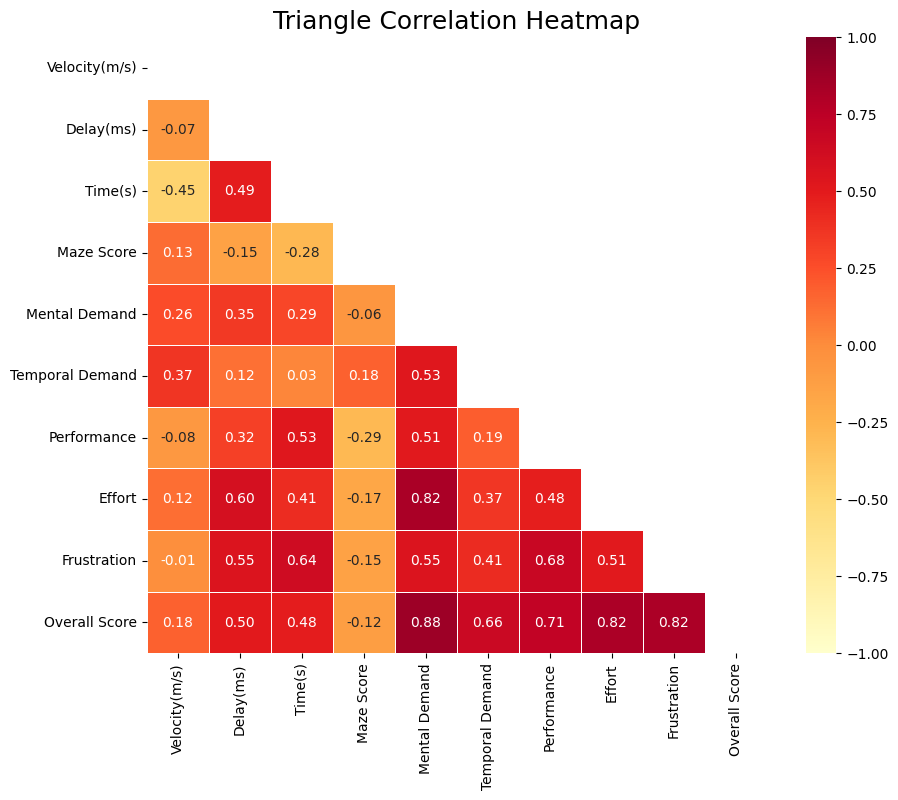

In [257]:
# Convert columns to numeric, coercing errors to NaN (skip 'Participant' and 'Run' columns)
data_numeric = data.drop(columns=['Participant', 'Run', 'Physical Demand']).apply(pd.to_numeric, errors='coerce')

# Generate the correlation matrix to compare the relationship between variables
correlation_matrix = data_numeric.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the triangle correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="YlOrRd", fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title("Triangle Correlation Heatmap", fontsize=18)
plt.show()

## 3. Bar plot: Metrics vs Delays

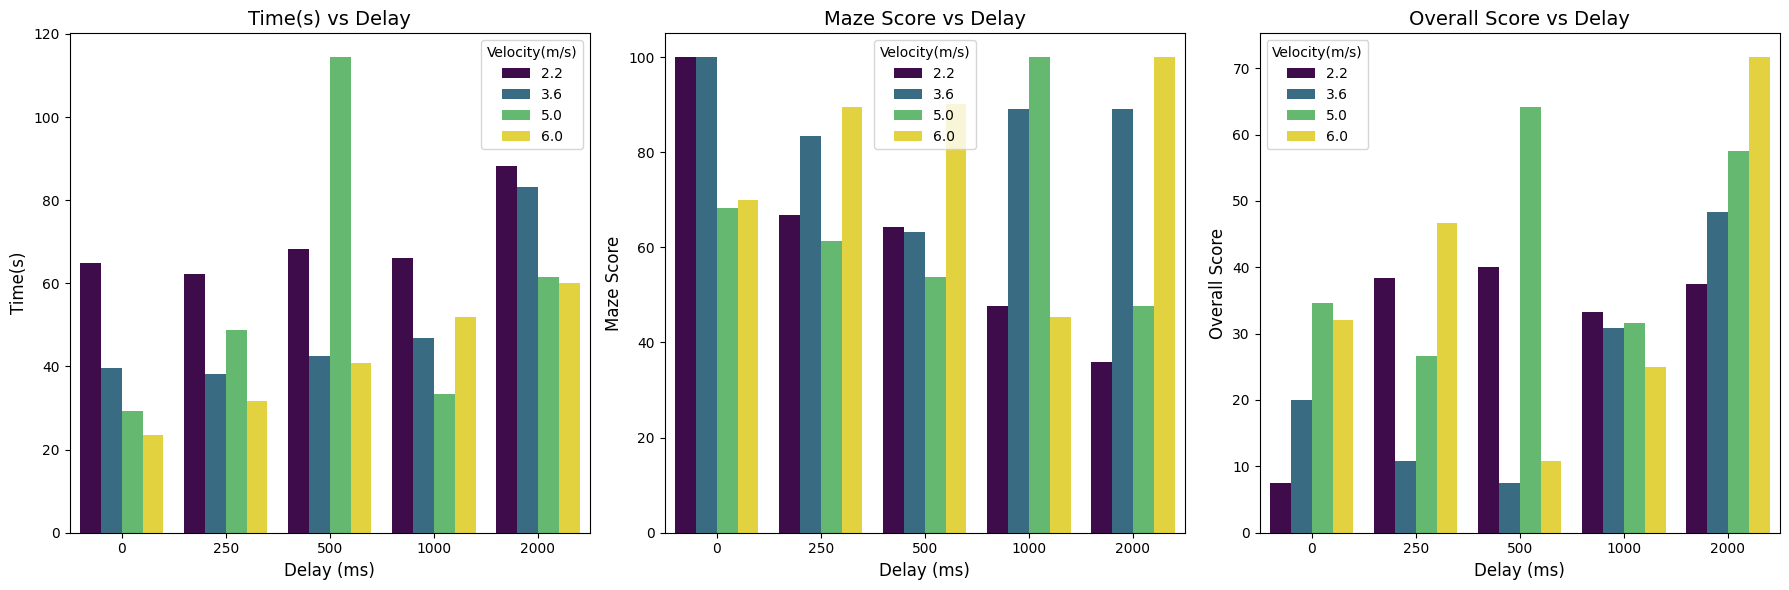

In [229]:
# Function to create a bar plot inside a specific subplot
def bar_plot(ax, data, x, y, title, xlabel, ylabel, hue, palette):
    sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue="Velocity(m/s)", palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()




## Barplots: Metrics vs Velocities

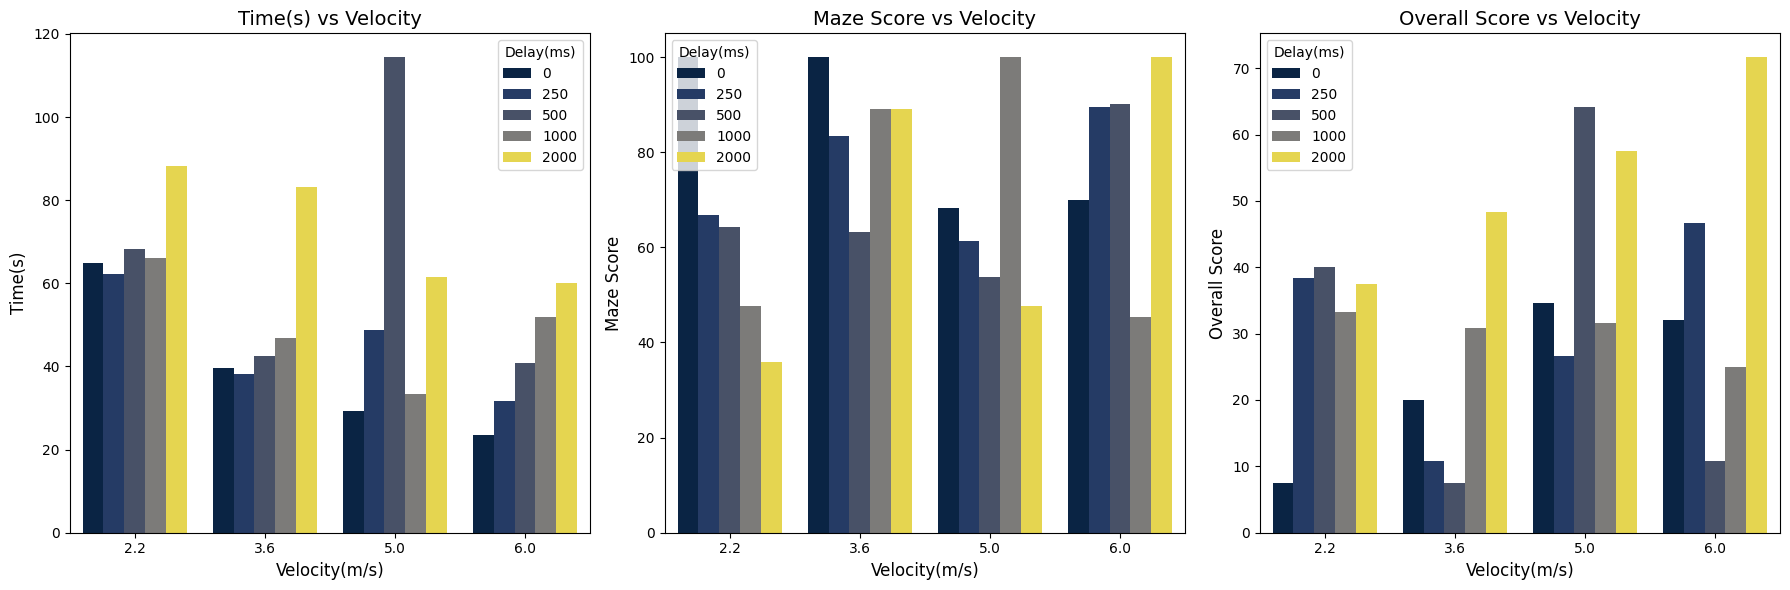

In [224]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Velocity(m/s)', column, f'{column} vs Velocity', 'Velocity(m/s)', column, hue="Delay(ms)", palette="cividis")
# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

## Bar plots without Hue: Delay

C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\2967296996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)


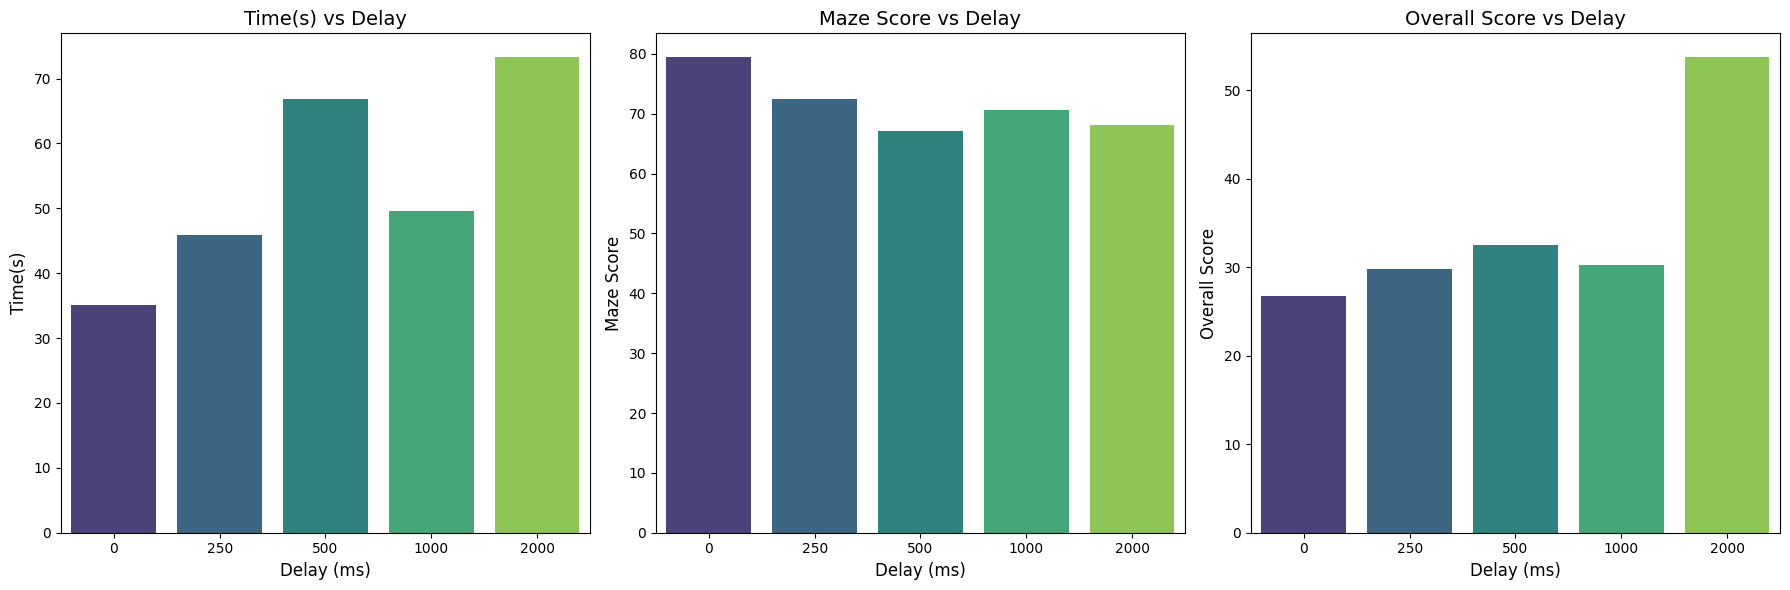

In [226]:
# Function to create a bar plot inside a specific subplot
def bar_plot(ax, data, x, y, title, xlabel, ylabel, hue, palette):
    sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Delay(ms)', column, f'{column} vs Delay', 'Delay (ms)', column, hue=None, palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## Bar plots without hue: Velocity

C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\3780092778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\3780092778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)
C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\3780092778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, errorbar=None, palette=palette, hue=hue, ax=ax)


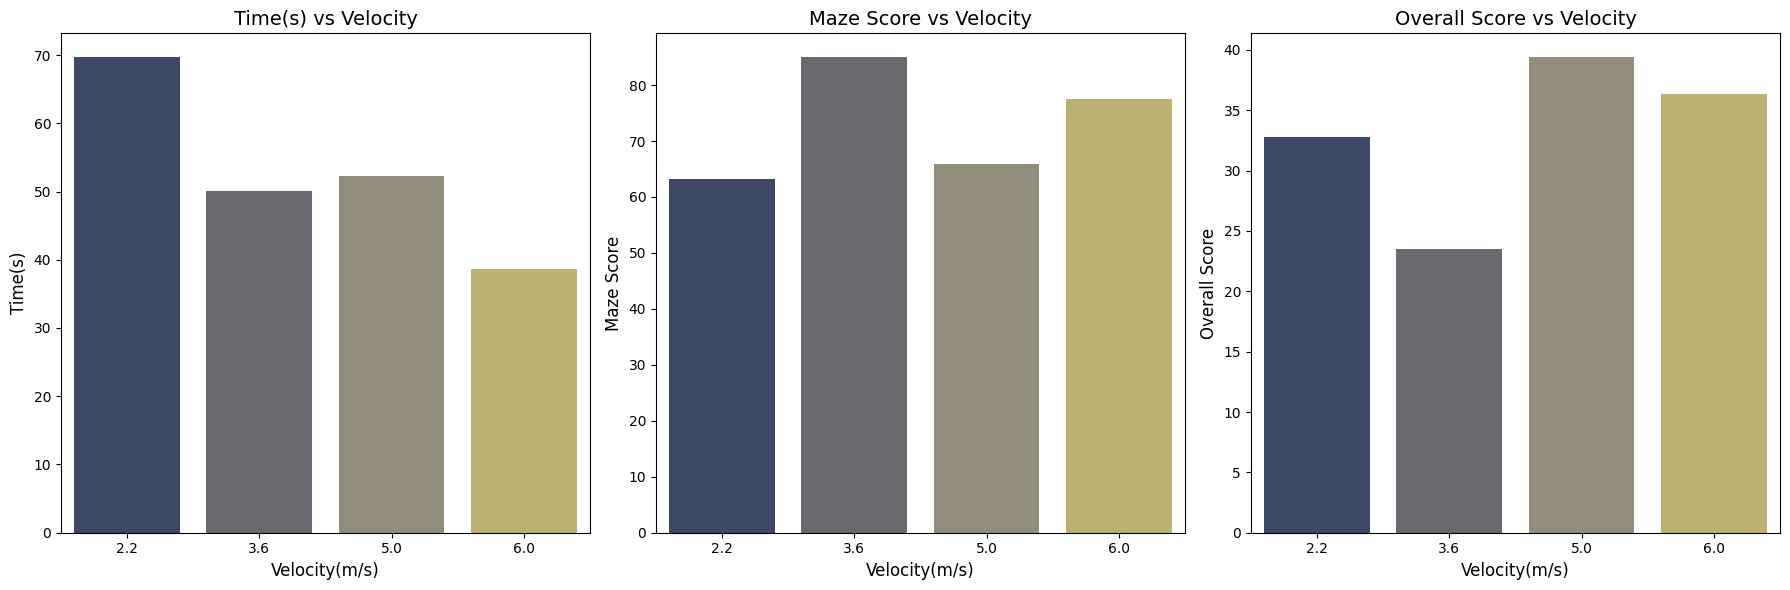

In [231]:
# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the number of subplots and size as necessary

# List of dependent variables to plot
columns = ['Time(s)', 'Maze Score', 'Overall Score']

# Loop over each column and create a subplot
for i, column in enumerate(columns):
    bar_plot(axes[i], data, 'Velocity(m/s)', column, f'{column} vs Velocity', 'Velocity(m/s)', column, hue=None, palette="cividis")
# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()

## 4. Box plot: Nasa dimensions vs Time delays

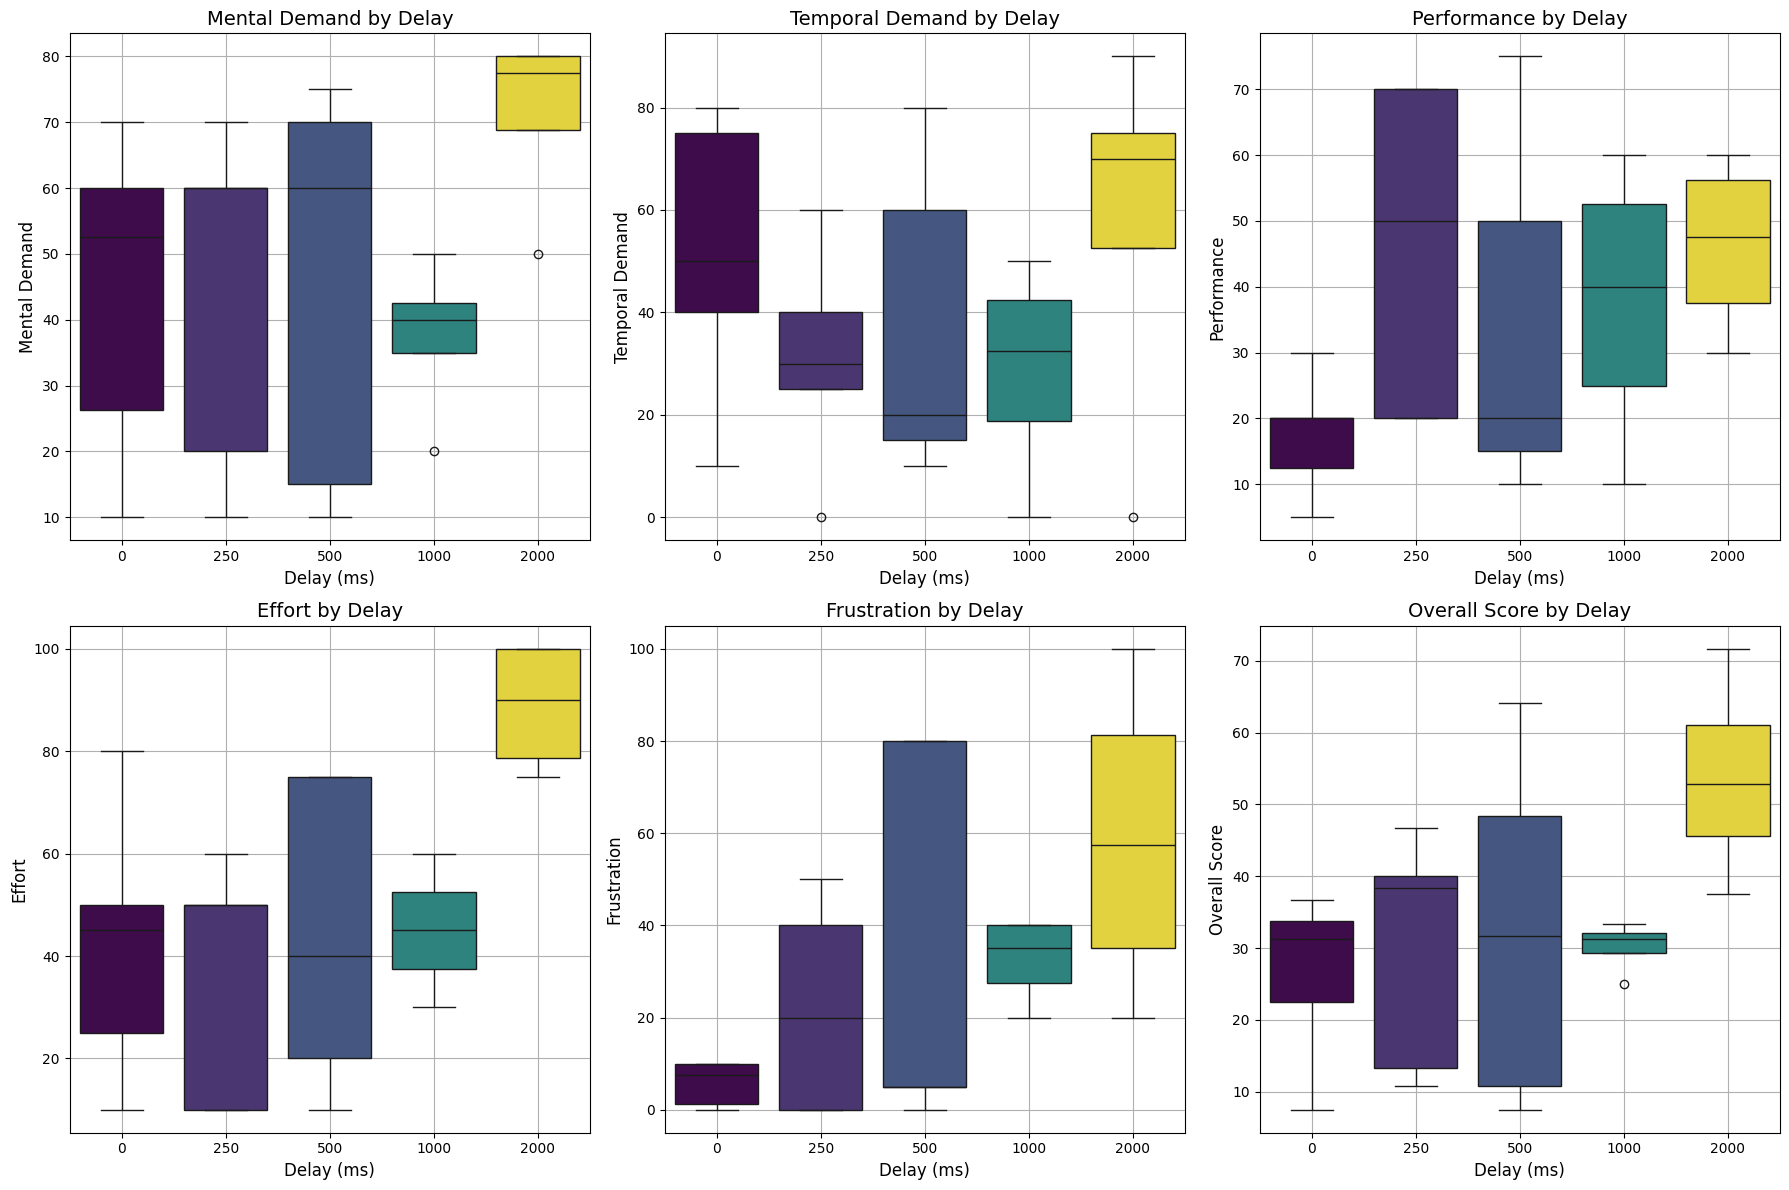

In [239]:
# Let's analyze the NASA-TLX scores by delay using a box plot for each of the NASA-TLX workload dimensions
# Create a function to plot a box plot for each NASA-TLX dimension
def box_plot(ax, data, x, y, title, xlabel, ylabel, palette):
    sns.boxplot(data=data, x=x, y=y, palette=palette, linewidth=1, ax=ax, legend=False, hue='Delay(ms)')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True)

# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust the number of subplots

# List of NASA-TLX dimensions to plot
workload_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Loop over each NASA-TLX dimension and create a subplot
for i, dim in enumerate(workload_dimensions):
    box_plot(axes[i//3, i%3], data, 'Delay(ms)', dim, f'{dim} by Delay', 'Delay (ms)', dim, palette="viridis")

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

# Show the combined figure with subplots
plt.show()


## 5. Bar plot: Time and Maze Scores by Participant

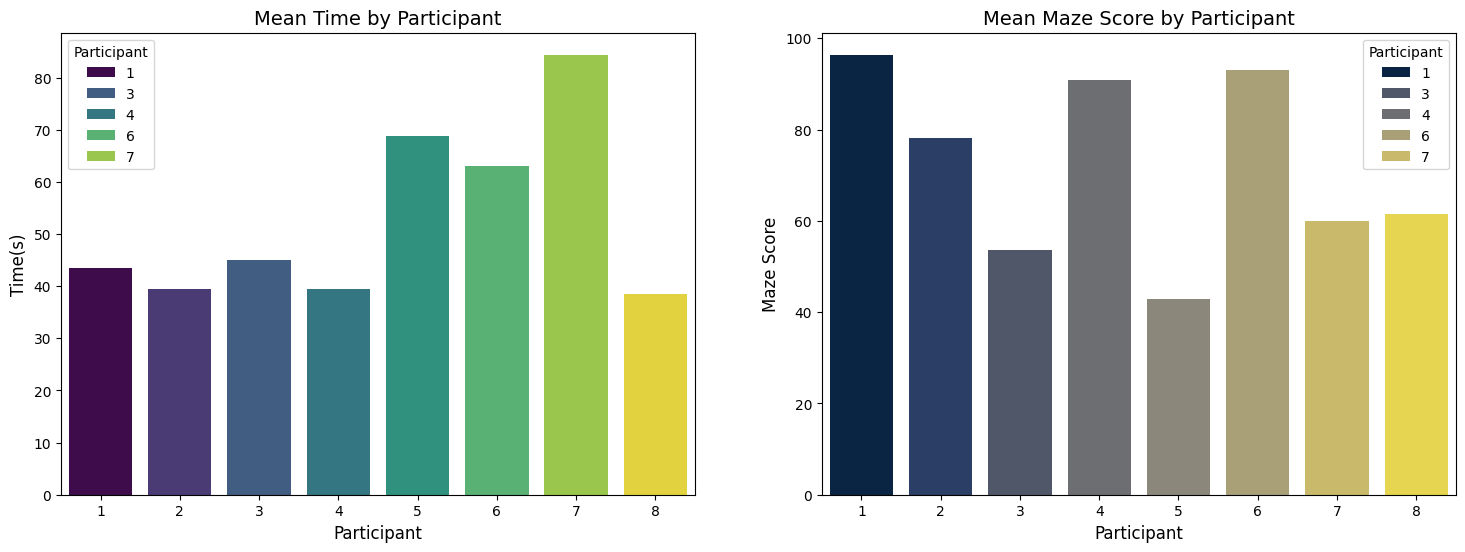

In [248]:
# Bar plot: Mean Maze Score by Participant with Velocity as hue and time delay as hue
# Using the bar_plot function defined earlier
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

bar_plot(axes[0], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', 'Participant', 'viridis')
bar_plot(axes[1], data, 'Participant', 'Maze Score', 'Mean Maze Score by Participant', 'Participant', 'Maze Score', 'Participant', 'cividis')



## 5.1: Time Scores by participant

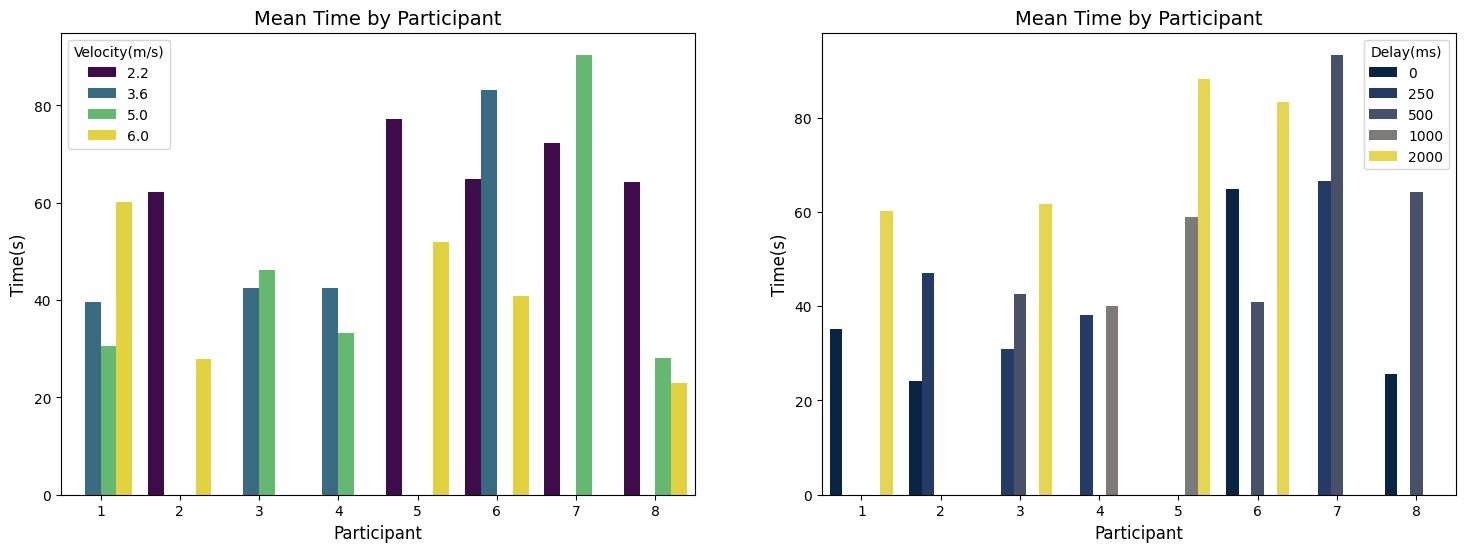

In [241]:
# Bar plot: Time score by Participant
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

bar_plot(axes[0], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', 'Velocity(m/s)', 'viridis')
bar_plot(axes[1], data, 'Participant', 'Time(s)', 'Mean Time by Participant', 'Participant', 'Time(s)', 'Delay(ms)', 'cividis')


## 5.2: Nasa overall score by Participant

C:\Users\raul_\AppData\Local\Temp\ipykernel_26400\2478265016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Participant", y="Overall Score", errorbar=None, palette="cividis")


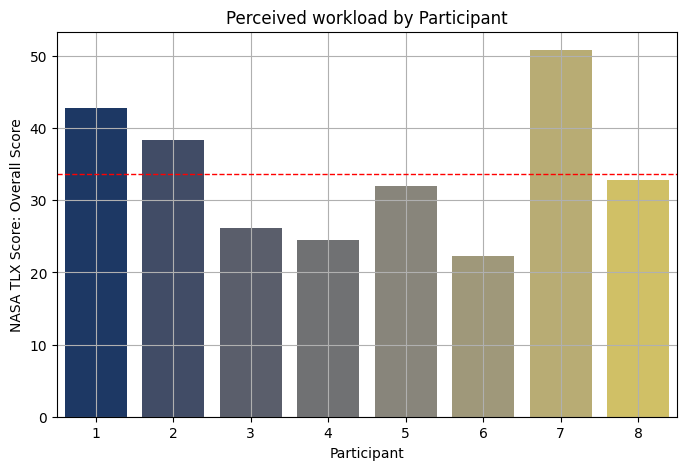

In [73]:
# Bar plot: Mean Maze Score by Participant
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Participant", y="Overall Score", errorbar=None, palette="cividis")
# Add a horizontal line at the mean
plt.axhline(data["Overall Score"].mean(), color='red', linestyle='--', linewidth=1)
plt.title("Perceived workload by Participant")
plt.ylabel("NASA TLX Score: Overall Score")
plt.grid(True)
plt.show()

## 5.3: Velocity vs time delay

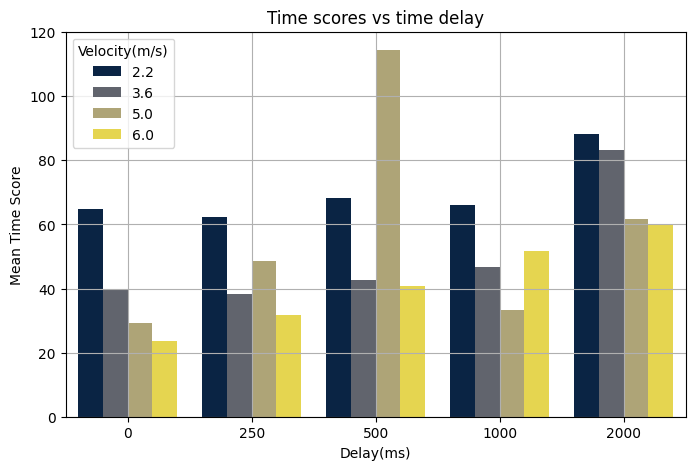

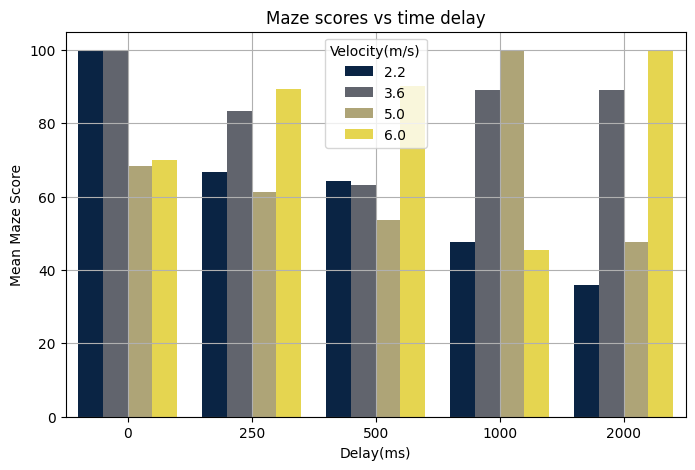

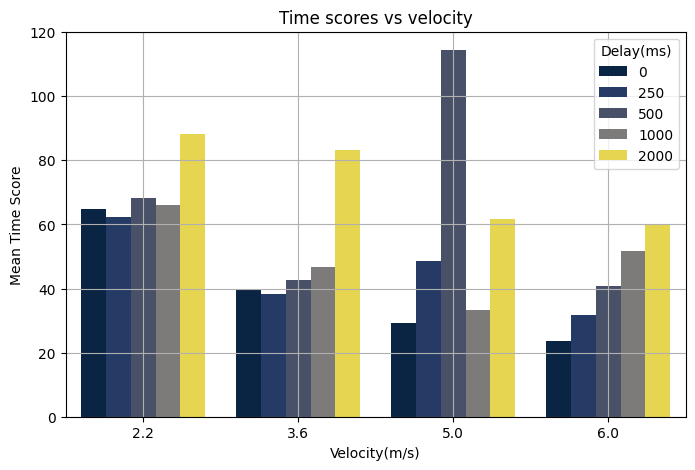

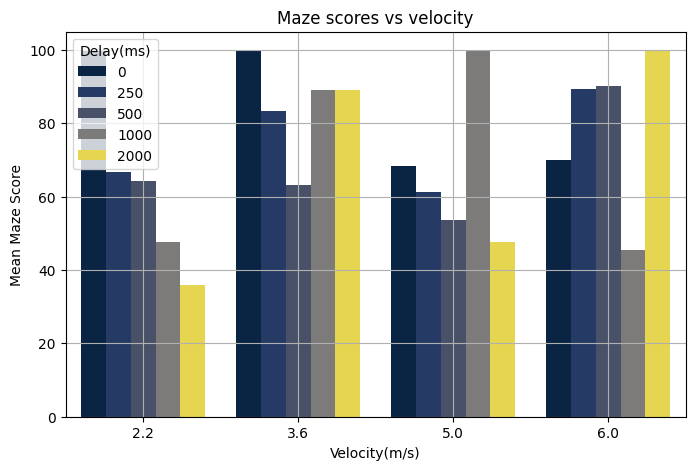

In [188]:
# Bar plot: Mean time score by time delay
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Delay(ms)", y="Time(s)", errorbar=None, palette="cividis", hue="Velocity(m/s)")
plt.title("Time scores vs time delay")
plt.ylabel("Mean Time Score")
plt.grid(True)
plt.show()

# Bar plot: Mean maze score by time delay
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Delay(ms)", y="Maze Score", errorbar=None, palette="cividis", hue="Velocity(m/s)")
plt.title("Maze scores vs time delay")
plt.ylabel("Mean Maze Score")
plt.grid(True)
plt.show()

# Bar plot: Mean time score by velocity
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Velocity(m/s)", y="Time(s)", errorbar=None, palette="cividis", hue="Delay(ms)")
plt.title("Time scores vs velocity")
plt.ylabel("Mean Time Score")
plt.grid(True)
plt.show()

# Bar plot: Mean maze score by velocity
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Velocity(m/s)", y="Maze Score", errorbar=None, palette="cividis", hue="Delay(ms)")
plt.title("Maze scores vs velocity")
plt.ylabel("Mean Maze Score")
plt.grid(True)
plt.show()


## 6. Histograms: Time and Maze Score distribution

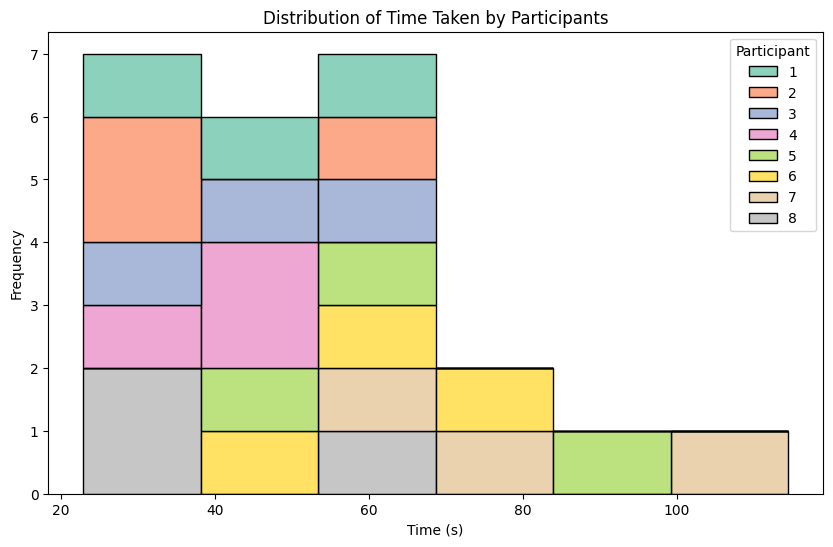

In [75]:
# Distribution of Time taken
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Time(s)", hue="Participant", multiple="stack", palette="Set2")
plt.title("Distribution of Time Taken by Participants")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.show()

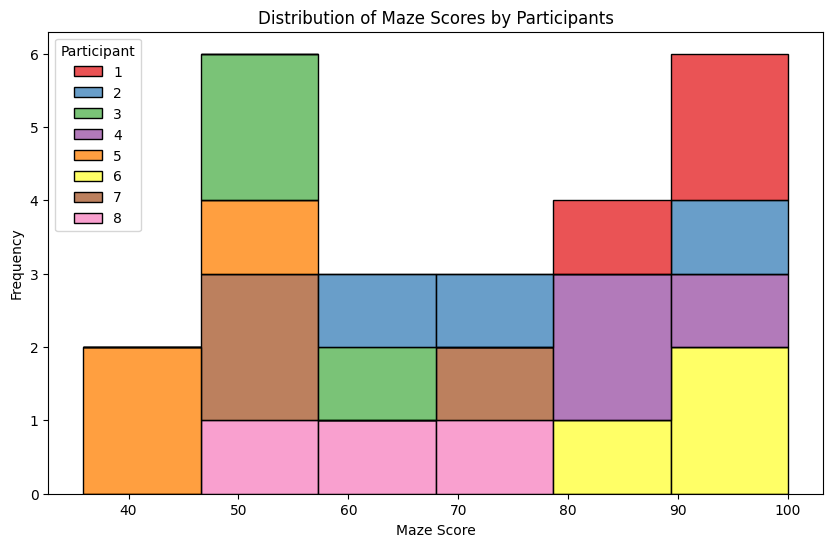

In [76]:
# Distribution of Maze Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Maze Score", hue="Participant", multiple="stack", palette="Set1")
plt.title("Distribution of Maze Scores by Participants")
plt.xlabel("Maze Score")
plt.ylabel("Frequency")
plt.show()

## Regression Analysis

In [262]:
import statsmodels.api as sm
import pandas as pd

# Ensure 'Maze Score' or any similar column is numeric
if 'Maze Score' in data.columns:
    data['Maze Score'] = pd.to_numeric(data['Maze Score'], errors='coerce')

# Nasa-TLX dimensions to analyze
nasa_tlx_dimensions = ['Mental Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']

# Define independent and dependent variables
independent_vars = ['Delay(ms)', 'Velocity(m/s)']  # Independent variables
dependent_vars = ['Time(s)', 'Maze Score'] + nasa_tlx_dimensions  # Dependent variables

# Initialize a dictionary to hold results for each independent variable
regression_results = {independent_var: [] for independent_var in independent_vars}

# Perform OLS regression for each dependent variable
for dependent_var in dependent_vars:
    if dependent_var in data.columns:
        X = sm.add_constant(data[independent_vars])  # Both independent variables with constant
        y = data[dependent_var]  # Dependent variable
        
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        
        # Collect results for each independent variable in the current model
        for independent_var in independent_vars:
            conf_int = model.conf_int().loc[independent_var]  # Get confidence intervals
            
            # Collect results for the current dependent variable
            regression_results[independent_var].append({
                "Dependent Variable": dependent_var,
                "Coefficient": model.params[independent_var],
                "Standard Error": model.bse[independent_var],
                "t-Value": model.tvalues[independent_var],
                "P>|t|": model.pvalues[independent_var],
                "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
            })

# Display a separate table for each independent variable
for independent_var in independent_vars:
    print(f"OLS Regression Results for Independent Variable: {independent_var}")
    regression_summary_df = pd.DataFrame(regression_results[independent_var])
    display(regression_summary_df.style.format({
        "Coefficient": "{:.4f}",
        "Standard Error": "{:.4f}",
        "t-Value": "{:.4f}",
        "P>|t|": "{:.4f}"
    }))
    print("\n")


OLS Regression Results for Independent Variable: Delay(ms)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),0.0149,0.0055,2.7181,0.0129,"[0.003, 0.026]"
1,Maze Score,-0.0041,0.0064,-0.6412,0.5283,"[-0.017, 0.009]"
2,Mental Demand,0.0128,0.0068,1.8802,0.0740,"[-0.001, 0.027]"
3,Temporal Demand,0.0059,0.0082,0.7185,0.4804,"[-0.011, 0.023]"
4,Performance,0.0098,0.0065,1.5091,0.1462,"[-0.004, 0.023]"
5,Effort,0.0243,0.0068,3.5640,0.0018,"[0.010, 0.038]"
6,Frustration,0.0238,0.0078,3.0591,0.0060,"[0.008, 0.040]"
7,Overall Score,0.0128,0.0045,2.8448,0.0097,"[0.003, 0.022]"




OLS Regression Results for Independent Variable: Velocity(m/s)


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time(s),-6.5602,2.6068,-2.5165,0.0200,"[-11.981, -1.139]"
1,Maze Score,1.7084,3.0456,0.5610,0.5808,"[-4.625, 8.042]"
2,Mental Demand,4.7723,3.2334,1.4759,0.1548,"[-1.952, 11.497]"
3,Temporal Demand,7.3137,3.8825,1.8837,0.0735,"[-0.760, 15.388]"
4,Performance,-0.7892,3.0848,-0.2558,0.8006,"[-7.204, 5.626]"
5,Effort,3.1758,3.2425,0.9794,0.3385,"[-3.567, 9.919]"
6,Frustration,0.5893,3.7009,0.1592,0.8750,"[-7.107, 8.286]"
7,Overall Score,2.5103,2.1326,1.1771,0.2523,"[-1.925, 6.945]"


## Heat map

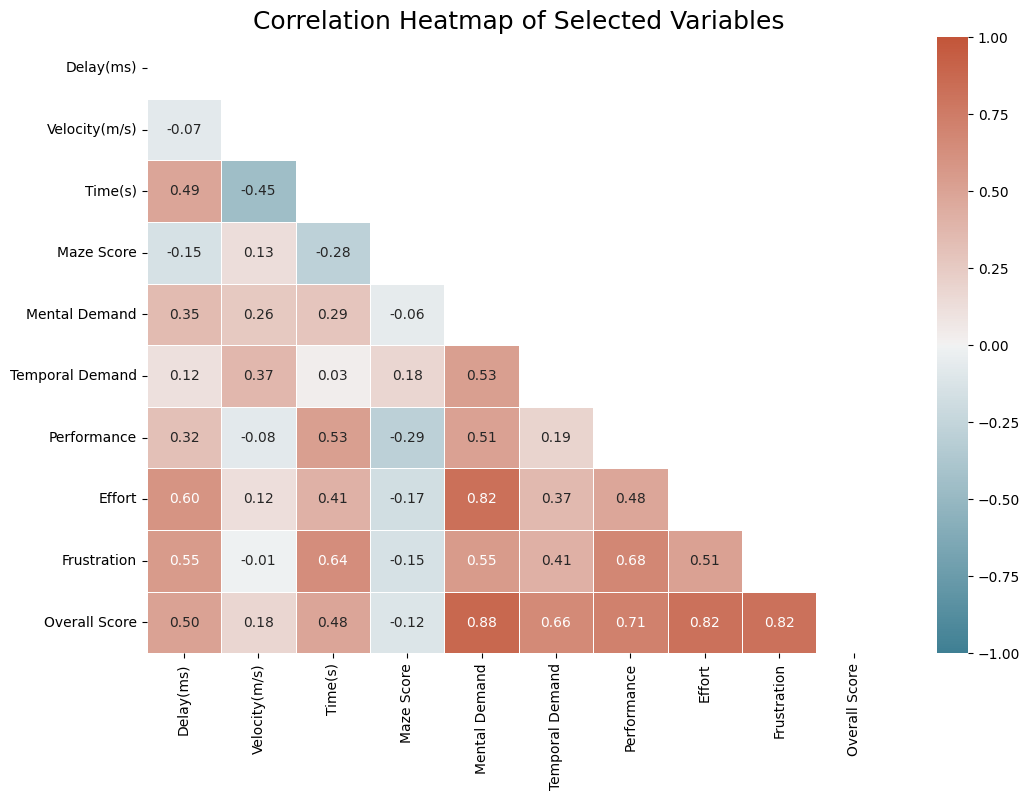

In [271]:
# Plotting a heatmap of correlations between the variables including the independent variable
# Select the independent variable and dependent variables to include in the heatmap
independent_vars = ['Delay(ms)', 'Velocity(m/s)']
dependent_vars = ['Time(s)', 'Maze Score'] + nasa_tlx_dimensions

# Create a new DataFrame with the selected variables
data_selected = data[independent_vars + dependent_vars]

# Compute the correlation matrix
correlation_matrix = data_selected.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, linewidths=.5, mask=mask)
plt.title("Correlation Heatmap of Selected Variables", fontsize=18)
plt.show()


## 7. Save analyzed data

In [78]:
# Save the analyzed dataset to a CSV for further analysis if needed
data.to_csv("analyzed_data_output.csv", index=False)